In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

### Data Description
<br> Age of patient at time of operation (numerical)
<br> Patient's year of operation (year - 1900, numerical)
<br> Number of positive axillary nodes detected (numerical)
<br> Survival status (class attribute)
<br> 1 = the patient survived 5 years or longer
<br> 2 = the patient died within 5 year

### Objective

To understand about all the feature and identifying which feature helps us in determining a patient will survive or not survive

In [2]:
# importing haberman.csv file

df = pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"],skiprows=1)
df.head(5)

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# Number of data points and columns in the dataset 

print('Number of data points: ',df.shape[0])
print('Number of columns/features: ',df.shape[1])

Number of data points:  306
Number of columns/features:  4


In [4]:
# listing all the column names

df.columns.tolist()

['age', 'operation_Year', 'axil_nodes', 'survival_status']

In [5]:
# Number of classes in target varaible

print('Number of classes is: ',df['survival_status'].nunique())

Number of classes is:  2


In [6]:
# datatype of all the columns

df.dtypes

age                int64
operation_Year     int64
axil_nodes         int64
survival_status    int64
dtype: object

In [7]:
# Checking for missing values

df.isnull().sum()

age                0
operation_Year     0
axil_nodes         0
survival_status    0
dtype: int64

In [8]:
# Number of data points per class
print('\033[1mNumber of data points for each class')
display(df['survival_status'].value_counts())


Number of data points for each class


1    225
2     81
Name: survival_status, dtype: int64

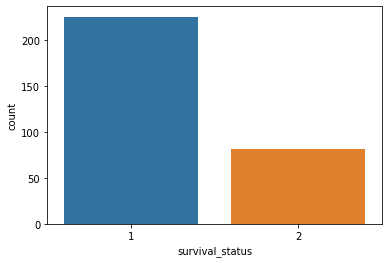

Percentage of data points for each class


1    74.0
2    26.0
Name: survival_status, dtype: float64

In [9]:
sns.countplot(df['survival_status'])
plt.show()

print('\033[1mPercentage of data points for each class')
round((df['survival_status'].value_counts()/df.shape[0])*100)


**Observation(s):**
1. By looking at the percentage distribution of target varaible we can understand that the data is imbalanced. 
2. So from this data most(74%) of the patient who undergone surgery survived 5 years or longer
3. 26% of them died within 5 years

In [10]:
# Statistical summary
df.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observation(s):**
1. The age group range is between 30-83 and the average age is 52
2. axil_nodes range is between 0-52 but 75% of nodes lies below 4 nodes so it seems there is some extreme values

### Univariate analysis

<AxesSubplot:xlabel='age', ylabel='Density'>

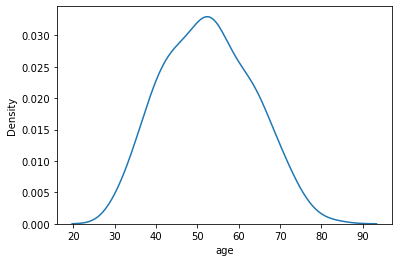

In [11]:
# Understanding the distribution of the column age 
# PDF

sns.distplot(df['age'],hist=False)

**Observation(s):**
1. The distribution of age looks like normal distribution but not exactly normal distribution 
2. As we already understood most of the patients age is around 50 and very few of them belongs to 20-40 and 70-80


[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


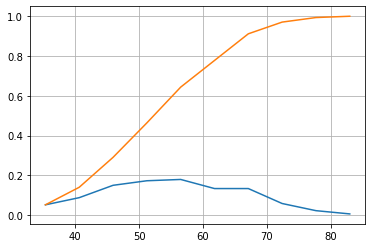

In [12]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


#counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, density = True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);
plt.grid()
plt.show();


**Observation(s):**
1. From the CDF we can able understand how many % of patients lies between each age
2. Only 16% of patients are less than age 40

<AxesSubplot:xlabel='age'>

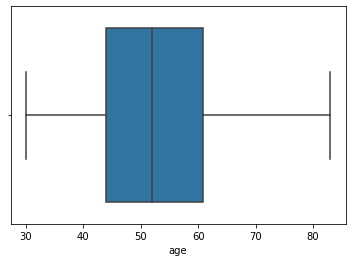

In [13]:
# Checking for outliers
sns.boxplot(df['age'])


**Observation(s):**
1. From the above boxplot we can able to understand that there is no extreme values in the age column

In [14]:
print(df['operation_Year'].value_counts())
print('\n \033[1mNumber of unique values: ',df['operation_Year'].nunique())

58    36
64    31
63    30
60    28
65    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: operation_Year, dtype: int64

 Number of unique values:  12


**Observation(s):**
1. Operation year column looks like a categorical feature since the unique values out 304 data points is only 12


<AxesSubplot:xlabel='operation_Year', ylabel='count'>

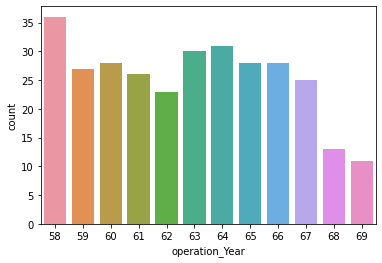

In [15]:
sns.countplot(df['operation_Year'])

**Observation(s):**
1. From the countplot we can able to understand that there were more operations done in the year 58 and very less operations in the year 68 and 69


<AxesSubplot:xlabel='axil_nodes', ylabel='Density'>

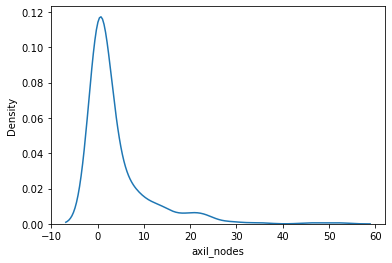

In [16]:
sns.distplot(df['axil_nodes'],hist=False)

**Observation(s):**
1. The distribution of axil_nodes is right skewed(positive_skewed) 
2. Most of the nodes range between 0 -10 and very few has extreme number of nodes

<AxesSubplot:xlabel='axil_nodes'>

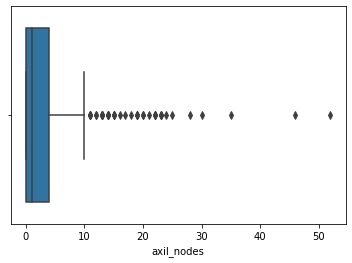

In [17]:
# Checking for outliers
sns.boxplot(df['axil_nodes'])

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


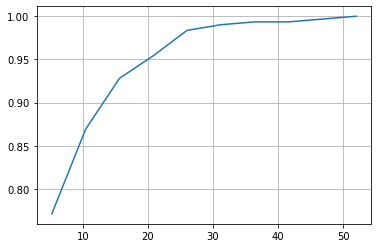

In [18]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(df['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


#counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, density = True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);
plt.grid()
plt.show();


In [19]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df['axil_nodes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 1
60 percentile value is 2
70 percentile value is 3
80 percentile value is 7
90 percentile value is 13
100 percentile value is  52


**Observation(s):**
1. 90% of patients having nodes less than 13

In [20]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =df['axil_nodes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 13
91 percentile value is 14
92 percentile value is 15
93 percentile value is 16
94 percentile value is 19
95 percentile value is 20
96 percentile value is 22
97 percentile value is 23
98 percentile value is 24
99 percentile value is 30
100 percentile value is  52


In [21]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df['axil_nodes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 30
99.1 percentile value is 35
99.2 percentile value is 35
99.3 percentile value is 35
99.4 percentile value is 46
99.5 percentile value is 46
99.6 percentile value is 46
99.7 percentile value is 52
99.8 percentile value is 52
99.9 percentile value is 52
100 percentile value is  52


From the above analysis we can able to understand that average node is 4 and there are some extreme values also

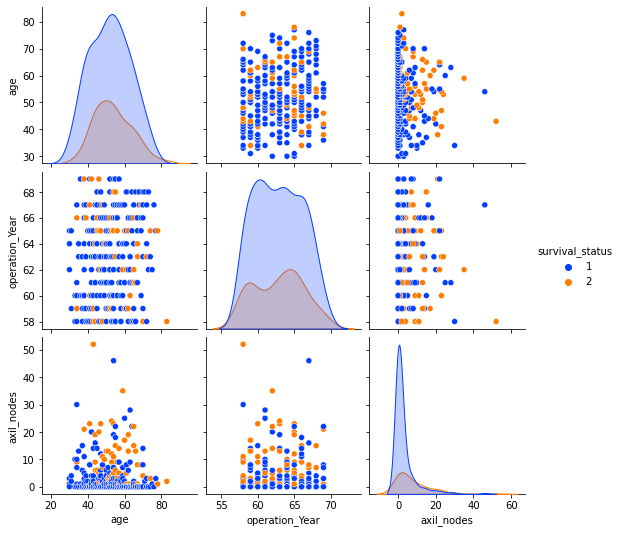

In [22]:
sns.pairplot(df, hue='survival_status',palette=sns.color_palette('bright')[:2])
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

<AxesSubplot:xlabel='axil_nodes', ylabel='age'>

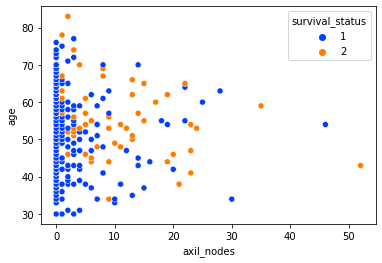

In [23]:
sns.scatterplot(df['axil_nodes'],df['age'],hue=df['survival_status'],palette=sns.color_palette('bright')[:2])

**Observation(s):**
1. From the above plot we can able to see almost all plots are getting overlapped
2. There is not proper plot were we can seperate 1 and 2 class perfectly
3. But comparing all plots age and axil_nodes is important feature to determine the survival status
4. As number of nodes increase we can able to see more points belongs to class 2(not survive)


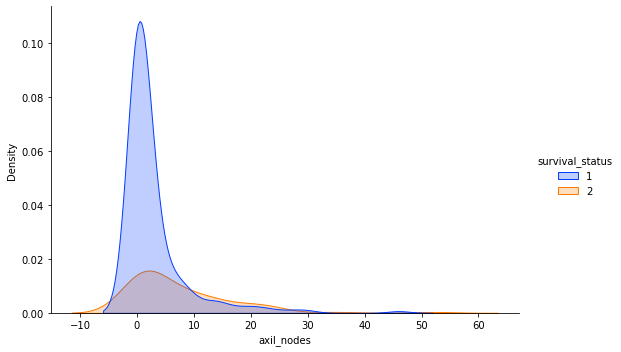

In [24]:
sns.displot(data=df, x='axil_nodes', hue='survival_status', kind='kde', fill=True,  palette=sns.color_palette('bright')[:2],height=5, aspect=1.5)

**Observation(s):**
1. We can able to see that if a person is having lower number of nodes (<5) the chance of suriving is very high

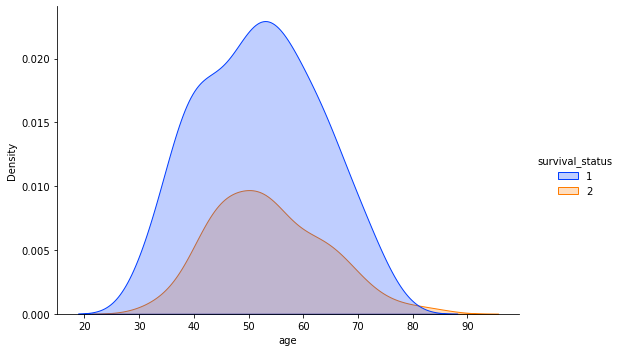

In [25]:
sns.displot(data=df, x='age', hue='survival_status', kind='kde', fill=True,  palette=sns.color_palette('bright')[:2],height=5, aspect=1.5)

**Observation(s):**
1. From the above plot we can able to understand that if a patient is between 20-30 age the chance of surviving is very high
2. As the age increases above 30 the chances of not surviving also increases 
3. if a patient is above 80 the chance of not surviving is very higher

### Conclusion

1. From all our analysis we can able to understand that the important features to determine whether a patient will survive or not survive are Age and number of nodes(axil_nodes)
2. As the number of nodes increases the chance of surviving reduces
3. Also as the age increases the chance of not surviving also increase
4. And there are few extreme values present in axil_nodes column